# Data Science 1 : Group 24
# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. [1]

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

## importing necessary libraries.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading train dataset

In [69]:
df = pd.read_csv('train.csv') # Dataset[1]link in the references section

print(df.shape)
df.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Loading test dataset

In [70]:
df2 = pd.read_csv('test.csv')
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [71]:
print(df2.shape) # checking the number of rows and columns in the test dataset

(233599, 11)


### Visualizing first 5 rows of the train dataset.


In [72]:
df.head()#displaying first 5 rows of train dataset 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [73]:
df.tail()#displaying last 5 rows of train dataset 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


### Describing the basic statistics of the data.

In [74]:
df.describe() #Displaying basic statistics of the training data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Dropping unnecessary fields from the dataset.


In [75]:
df.drop(['User_ID'],axis=1,inplace=True) #Drop field of User_ID 

In [76]:
df.head() # checking the dataset after dropping User_ID field

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Converting categorical data into integer ones by using mapping function.

In [77]:
df['Gender']=df['Gender'].map({'F':0, 'M':1}) #Converting categorical data into integer ones by using mapping function
df['Gender'].head(10) # checking the column after transformation

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

### Visualizing the unique values of the particular field.

In [78]:
df.Age.unique() #Visualizing the unique values of the particular field

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Mapping the range variable into integer ones.

In [79]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 }) #Mapping the range variable into integer ones

In [80]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [81]:
df.City_Category.unique() # checking the uniquce values in the City_Category column

array(['A', 'C', 'B'], dtype=object)

### Creating dummies for the categorical data.

In [82]:
city = pd.get_dummies(df['City_Category'],drop_first=True) #creating dummies for the data
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


### Concatenating Dummy variables with original dataset

In [83]:
df = pd.concat([df,city],axis=1)  #Concatenate dummy variable with original dataset 
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


### Checking for columnwise null values 

In [84]:
df.isnull().sum() #Checking for number of nulls in each column(Field) 

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

### Visualizing unique values of fields which contain NAN values for different columns.

In [85]:
df.Product_Category_1.unique()  #Unique values of category 1 with NAN values

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [86]:
df.Product_Category_2.unique()  #Unique values of category 2 with NaN values

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [87]:
df.Product_Category_3.unique()  #Unique values of category 3 with NaN values

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of each variable.

In [88]:
df.Product_Category_2.value_counts()  

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

### Finding mode of the field.

In [89]:
df.Product_Category_1.mode()  #calculating mode of category 1

0    5
dtype: int64


### Renaming the columns.

In [90]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

### Looking at the column names after the rename operation.

In [91]:
df.columns #Column names after renaming

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### Filling the NaN values with the mode.

In [92]:
df['cat2'] = df['cat2'].fillna(df['cat2'].mode()[0]) #filling the NAN values in category 2 with its mode

In [93]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,NaN,7969,0,1


In [94]:
df.cat2.mode() # checking the mode after transformation

0    8.0
dtype: float64

In [95]:
df['cat3'] = df['cat3'].fillna(df['cat3'].mode()[0]) #filling the NAN values in category 3 with its mode

In [96]:
df.isnull().sum() # checking the dataframe again for null values. category 1, category 2 and category 3 have no null values now.

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Filling the NaN values with the mean of the column.

In [97]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [98]:
df.head() # looking at the datset after filling the null value

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969,0,1


### Rechecking the null values.

In [99]:
df.isnull().sum() # all the null values have been removed

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

### Dropping the Column.

In [100]:
df.drop('City_Category',axis=1, inplace=True) #Dropping the field of City_category

In [101]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969,0,1


In [102]:
df.Stay_In_Current_City_Years.unique() # checking the unique values in the column Stay_In_Current_City_Years

array(['2', '4+', '3', '1', '0'], dtype=object)

### Replacing the value by using str method.

In [103]:
df['Stay_In_Current_City_Years']=df.Stay_In_Current_City_Years.str.replace('+','') # replacing + with blank

In [104]:
df.head() # checking the dataset after transformation

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969,0,1


### Checking the all over info of the dataset.

In [105]:
df.info() #Checking overall info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   cat1                        550068 non-null  int64  
 7   cat2                        550068 non-null  float64
 8   cat3                        550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 43.0+ MB


### Converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [106]:
#Converting fields of Stay_In_Current_City_Years, B and C from unsigned int to int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int) 
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

### Rechecking the datatypes and overall info of the dataset again after datatype transformation

In [107]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                        int64
B                               int32
C                               int32
dtype: object

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   cat1                        550068 non-null  int64  
 7   cat2                        550068 non-null  float64
 8   cat3                        550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 44.1+ MB


### Creating a checkpoint.

In [109]:

df_i = df.copy()

# Dropping the unnecessary field.
df_i.drop('Product_ID',axis=1,inplace=True)

In [110]:
df_i.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
5,1,3,15,3,0,1,2.0,16.0,15227,0,0
6,1,5,7,2,1,1,8.0,17.0,19215,1,0
7,1,5,7,2,1,1,15.0,16.0,15854,1,0
8,1,5,7,2,1,1,16.0,16.0,15686,1,0
9,1,3,20,1,1,8,8.0,16.0,7871,0,0


### Visualizing Age Vs Purchased.

C:\Users\Abhi\anaconda3\envs\fastai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


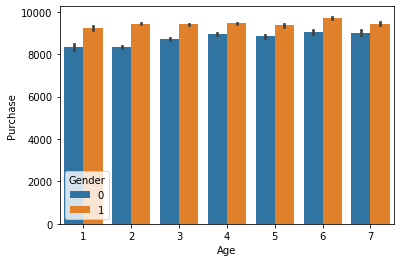

In [111]:
sns.barplot('Age','Purchase',hue='Gender',data=df_i)

Purchasing of goods of each range of age are almost equal.
We can conclude that the percentage of purchasing goods of men over women is higher.

### Visualizing Occupation Vs Purchased.

C:\Users\Abhi\anaconda3\envs\fastai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


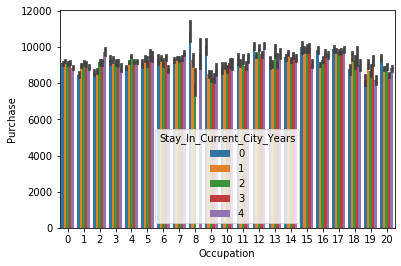

In [43]:
sns.barplot('Occupation','Purchase',hue='Stay_In_Current_City_Years',data=df_i)

All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

### Visualizing Product_category1 Vs Purchased.

C:\Users\Abhi\anaconda3\envs\fastai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


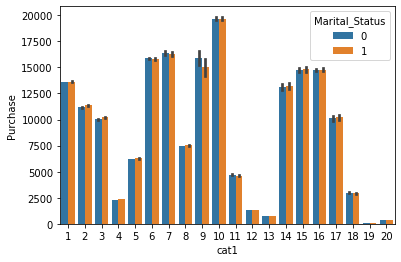

In [44]:
sns.barplot('cat1','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category2 Vs Purchased.

C:\Users\Abhi\anaconda3\envs\fastai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


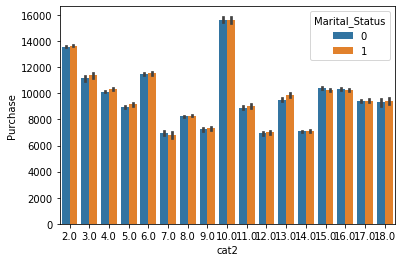

In [45]:
sns.barplot('cat2','Purchase',hue='Marital_Status',data=df_i)

### Visualizing Product_category3 Vs Purchased.

C:\Users\Abhi\anaconda3\envs\fastai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


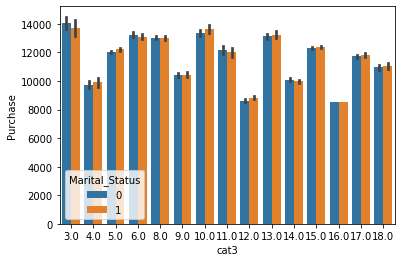

In [46]:
sns.barplot('cat3','Purchase',hue='Marital_Status',data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.
Product category3 is much more purchased by people than product category2 and product category1 

In [112]:
X = df_i.drop('Purchase',axis=1) # dropping the Purchase column to create features
y = df_i.Purchase  # selecting the Purchase column to create labels
print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


In [113]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
# randomly split the train data set into train and test(80:20 split) i.e 80% train and 20% test 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(440054, 10)
(440054,)
(110014, 10)
(110014,)


In [114]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
#just for information

X_train 

array([[ 0.57293664,  1.85013477,  1.82589917, ...,  0.36900856,
        -0.85117063, -0.67219007],
       [ 0.57293664,  0.3723307 , -1.08546949, ..., -0.36040912,
        -0.85117063,  1.48767447],
       [ 0.57293664, -1.8443754 ,  0.29359987, ...,  0.36900856,
        -0.85117063,  1.48767447],
       ...,
       [ 0.57293664,  1.85013477,  1.67266924, ...,  0.36900856,
        -0.85117063,  1.48767447],
       [ 0.57293664, -1.10547337, -0.93223956, ...,  0.36900856,
        -0.85117063, -0.67219007],
       [ 0.57293664, -0.36657133, -1.23869942, ...,  0.36900856,
        -0.85117063,  1.48767447]])

In [116]:
# just for information
X_test

array([[ 0.57293664, -1.10547337,  1.36620938, ...,  0.36900856,
        -0.85117063, -0.67219007],
       [ 0.57293664,  1.85013477,  1.82589917, ...,  0.36900856,
        -0.85117063, -0.67219007],
       [ 0.57293664,  1.11123274,  1.82589917, ...,  0.36900856,
        -0.85117063, -0.67219007],
       ...,
       [ 0.57293664,  0.3723307 ,  0.4468298 , ...,  0.7337174 ,
         1.17485257, -0.67219007],
       [-1.74539369, -1.10547337, -0.6257797 , ...,  0.36900856,
        -0.85117063,  1.48767447],
       [ 0.57293664, -0.36657133, -0.16608991, ...,  0.00429972,
         1.17485257, -0.67219007]])

Now we have features for both training and testing. The data can now be converted to a dataframe, if necessary, and can be fed to a machine learning model. 

# Hypothesis Testing
Let us verify the following statement using Hypothesis testing: Whether Men spend more than Women? <br>
Null Hypothesis : Two gender groups do not differ in spending. <br>
Alternte Hypotheis : Two gender groups differ in spending <br>
Here we have used two sample t-test[4] to verify this hypothesis. <br>
Note: The default p-value we have used to eliminate the null hypothesis is 0.05. In other words, the significance level $\alpha$ = 0.05 <br>

Assumption: The data values are independent and normally distributed <br> and the variances of the two independent groups are equal(We can verify it easily here!).

Why two sample t-test? For two sample t-test we need two variables. One variable defines the two groups (here, male and female) and the other variable is the measurement of interest(here, purchase amount) 




In [117]:
from scipy.stats import ttest_ind #two sample t-test scipy package

In [118]:
male = df[df.Gender == 1].Purchase  # Because Previously We mapped Female as 0 and Male as 1
female = df[df.Gender == 0].Purchase
t_test,pval = ttest_ind(male,female) # Get the test statistic and pvalue
print("The p-value and test statistic are:",str(pval),str(t_test))

print("Mean purchase of males : ",str(male.mean()))
print("Mean purchase of females :", str(female.mean()))

The p-value and test statistic are: 0.0 44.837957934353966
Mean purchase of males :  9437.526040472265
Mean purchase of females : 8734.565765155476


Important Note : The p-value that we get is just until one decimal place. <br>
Decision : Since p-value is less we can say that our null hypothesis is not true and there is a sigificance difference in spending amount between two age groups. <br>
Also, we can say that, the mean purchase of men is more than women.(We can also verify this by visualizing the bar plot that we plotted before.)

# Linear Regression
We want to predict the amount of money spent by a customer given its details(features).<br>
Firstly, we started with simple linear regression[3] along with the regularization methods (such as Lasso, ridge and Elastic Net) but the R2 score was too low on both train as well as test data set and so we decided to use some non linear regression methods such as Random Forest regressor[5].

>>Linear Regression: Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discrete/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.
i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

Where,
a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).



In [119]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # Call our linear regression function
lm.fit(X_train, y_train) #train out Linear regression model
print(lm.intercept_) # Slope and Intercept as of $y = mx + c$
print(lm.coef_)

9264.89471973894
[  226.81343617   169.53403174    41.97972476     8.3333595
   -27.02329792 -1591.28181565   -14.67383339  -420.29116952
    84.6702718    317.09924473]


In [120]:
y_pred = lm.predict(X_test) # Predict the values on test set

In [121]:
from sklearn.metrics import r2_score # It is the score giving how best our model fits to our data

In [122]:
r2_score(y_test,y_pred) #  we are getting pretty low R2 score on test set

0.1266914408115214

In [123]:
lm.score(X_train,y_train) # also R2 score is low on train set

0.13238736014557295

Let's try with Regularization methods(Lasso, Ridge and Elastic Net) to counter if over model overfits and hopefully to get better results

In [124]:
# importing all necesssary ML algorithms
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [125]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [126]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0026122663301215454

In [127]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0026122663301215454)

In [128]:
lasso_reg.score(X_test, y_test) # Again with regularization we are getting almost same R2 score

0.12669146769913564

In [129]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv = 10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [130]:
elasticCV.alpha_

3.465775560810758

In [131]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [132]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train) # Elastic net model

ElasticNet(alpha=3.465775560810758)

In [133]:
elasticnet_reg.score(X_test, y_test) # Still the R2 score is low

0.08470864625998209

In [138]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([6.19100960e+00, 3.02480565e+00, 4.16858928e+00, 3.86671286e+00,
       9.75876031e+00, 3.49392401e+00, 7.67775889e+00, 1.72687785e-03,
       1.49417176e+00, 6.55682660e+00, 2.92033301e+00, 9.90731686e-01,
       3.53150387e+00, 9.67901904e+00, 2.79164579e+00, 8.52495513e-01,
       7.21433490e+00, 9.82398434e+00, 3.90327305e+00, 2.02480220e+00,
       1.41688741e+00, 2.76610061e+0...
       6.06751075e+00, 5.86576584e+00, 2.53267303e+00, 1.39166663e+00,
       3.08525915e-01, 3.36703862e+00, 9.14675411e+00, 1.04024325e+00,
       4.20077994e+00, 5.20141112e+00, 3.08984646e+00, 5.86425572e-01,
       3.91469258e-02, 8.39310839e+00, 9.12318611e+00, 4.35232521e+00,
       6.21364459e+00, 8.17491079e+00, 8.36689194e+00, 3.51062039e+00,
       8.85877037e-01, 8.48179890e+00]),
        cv=10, normalize=True)

In [140]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)       # Ridge regression model

Ridge(alpha=0.0017268778485979297)

In [141]:
ridge_model.score(X_train, y_train)     # Still there is no improvement in the R2 score

0.13238736014557217

Let's try non linear models like RandomForest Regression

# Random Forest Regression

A random forest[5] is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses the averaging to improve the predictive accuracy and control over-fitting. It adds additional randomness to the model,while growing the trees. It searches for the best feature among the available features and thus generalizes better.
**In our case** since the dataset contains categorical features and some are continuous variables random forest is better choice than linear regression.




In [142]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,            
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)     #Check the reference [5] for detailed description of all parameters
forest.fit(X_train,y_train) # train the regressor
forest_train_pred = forest.predict(X_train) # predict  y_train
forest_test_pred = forest.predict(X_test) # predict y_test


print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred))) # print the R2 score on both train and test data set


R2 train data: 0.780, R2 test data: 0.636


Here we get significantly better R2 score on both train and test dataset.

Hyper-parameter: We can change the random state(using trail and error) and see that we can get better score.   

**Note** : We can also give a single row of features as the input to any of the above implemented regressors and we will get the predicted purchase amount corresponding to that entry. 

# Conclusion 

We started with Exploratory Data Analysis and imputing missing values and dropping unnecessary columns. We replaced the missing values with the mode of the values occuring in that column. Also, we visualized useful trends using bar plot and concluded the following important relations between the features: <br>

1. Purchasing of goods of all age groups is almost equal. <br>
2. The percentage of purchasing goods of men over women is higher. <br>
3. All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city. <br>
4. There is no such variation in the percentage of the purchasing whether the person is married or not. <br>
5. Product category 3 is much more purchased by people than product category 2 and product category 1. <br>

Then we verified the hypothesis using two sample t-test about whether there is a significant difference between the two gender in terms of purchasing and we concluded that men spent more than women.

At last, we used the linear regression for prediction of purchase amount for any new unseen data and we got the R2 score as 0.13 on train set and 0.12 on test set which is quite low and so we decided to use random forest regression to  and we got the better scores: 0.78 on train data and 0.636 on test data. We can also use other regression methods to get better results and fine tune the hyperparameters if there are any.


# References
1. Black friday Dataset (2018), Retrieved on 10 July 2021 from <https://www.kaggle.com/sdolezel/black-friday> <br>
2. seaborn: statistical data visualization, accessed 1 June 2021, https://seaborn.pydata.org/ <br>
3. Scikit-learn, Version: 0.24.2, accessed 1 June 2021, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
4. SciPy, accessed 19 May 2021, https://www.scipy.org/ <br>
5. Random Forest regressor, accessed 1 June 2021, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html <br>